<a href="https://colab.research.google.com/github/pillisrija/mlflaskapp/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [4]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
file_name=list(uploaded.keys())[0]
cars=pd.read_csv(file_name)

Saving Cars.csv to Cars.csv


In [5]:
import statsmodels.formula.api as smf
model = smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()

In [6]:
print(model.tvalues, '\n', model.pvalues)

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64


In [7]:

ml_v=smf.ols('MPG~VOL',data = cars).fit()
print(ml_v.tvalues, '\n', ml_v.pvalues)

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64


In [8]:
(model.rsquared,model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

In [9]:
(ml_v.rsquared,ml_v.rsquared_adj)

(0.27990086511227075, 0.27078568618964116)

In [10]:
ml_w=smf.ols('MPG~WT',data = cars).fit()
print(ml_w.tvalues, '\n', ml_w.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [11]:
ml_wv=smf.ols('MPG~WT+VOL',data = cars).fit()
print(ml_wv.tvalues, '\n', ml_wv.pvalues)

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


In [12]:
import pandas as pd
import statsmodels.formula.api as smf
rsq_hp = smf.ols('HP ~ WT + VOL + SP', data=cars).fit().rsquared
vif_hp = 1 / (1 - rsq_hp)
rsq_wt = smf.ols('WT ~ HP + VOL + SP', data=cars).fit().rsquared
vif_wt = 1 / (1 - rsq_wt)
rsq_vol = smf.ols('VOL ~ WT + HP + SP', data=cars).fit().rsquared
vif_vol = 1 / (1 - rsq_vol)
rsq_sp = smf.ols('SP ~ WT + VOL + HP', data=cars).fit().rsquared
vif_sp = 1 / (1 - rsq_sp)
vif_data = {'Variables': ['HP', 'WT', 'VOL', 'SP'], 'VIF': [vif_hp, vif_wt, vif_vol, vif_sp]}
vif_frame = pd.DataFrame(vif_data)
print(vif_frame)

  Variables         VIF
0        HP   19.926589
1        WT  639.533818
2       VOL  638.806084
3        SP   20.007639


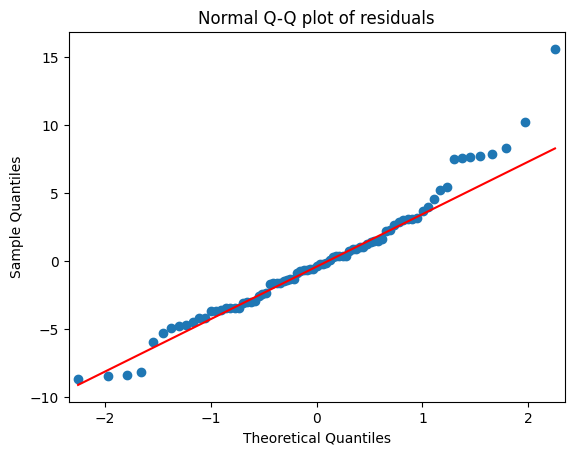

In [13]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q')
import matplotlib.pyplot as plt
plt.title('Normal Q-Q plot of residuals')
plt.show()


In [14]:
list(np.where(model.resid>10))

[array([ 0, 76])]

In [15]:
def get_standardized_values(vals):
    return (vals-vals.mean())/vals.std()

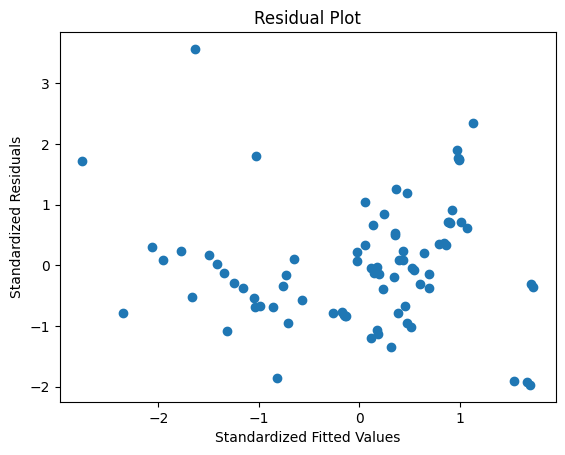

In [16]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residuals')
plt.show()

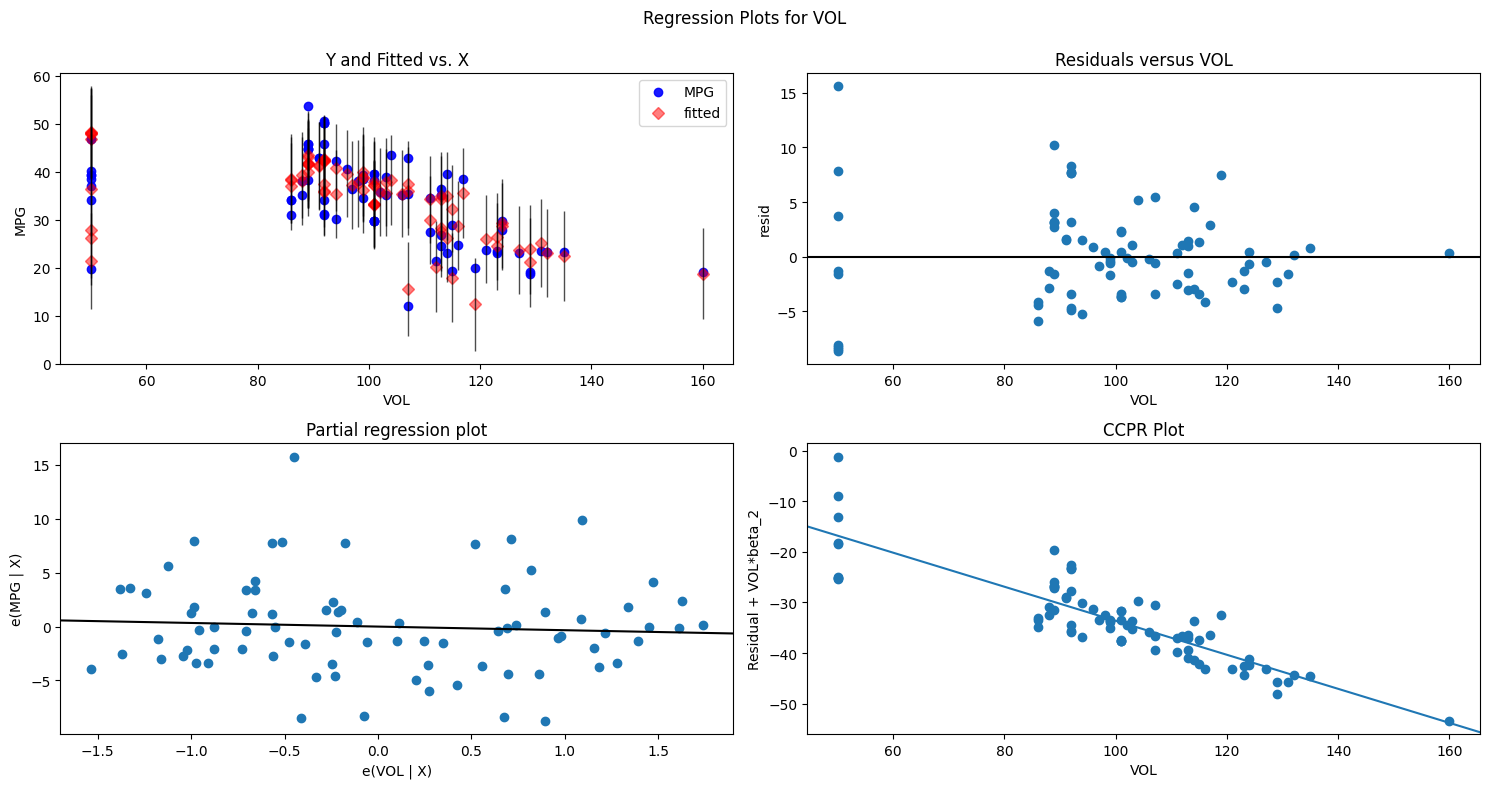

In [17]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, 'VOL', fig=fig)
plt.show()

In [18]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

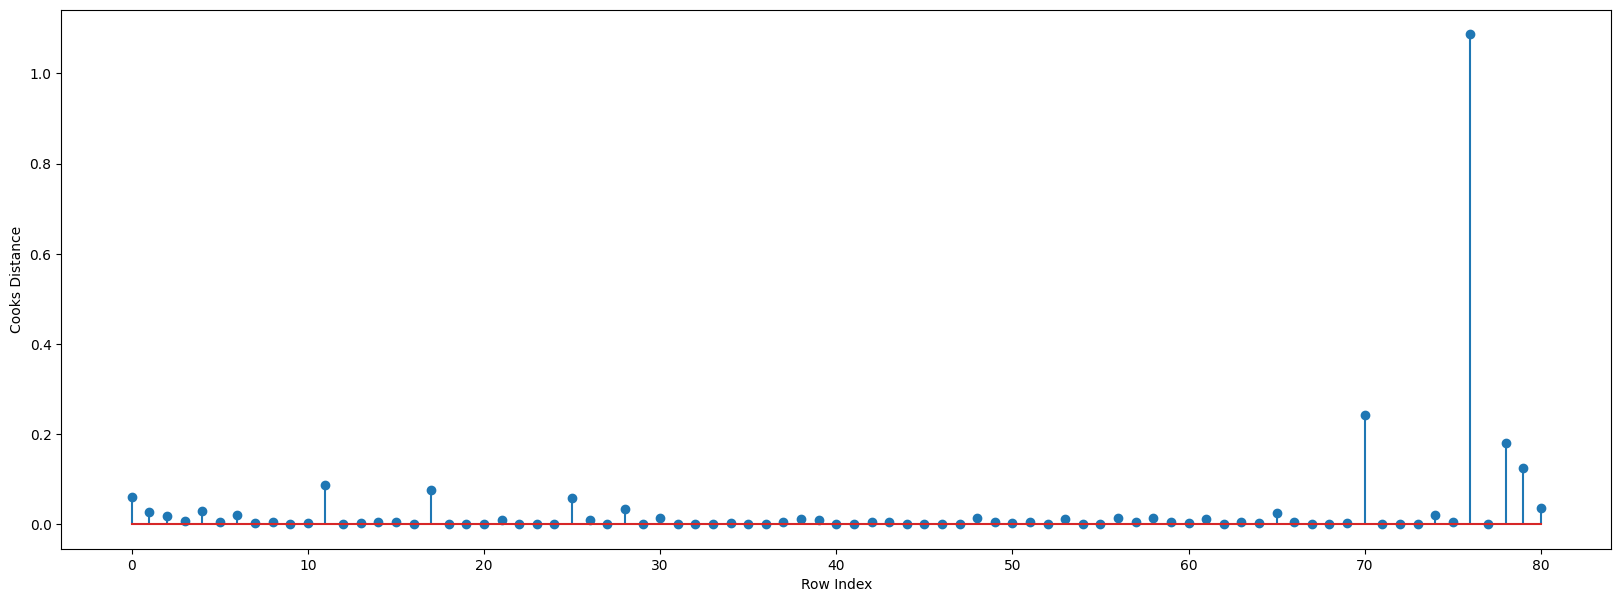

In [19]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(cars)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [21]:
(np.argmax(c),np.max(c))

(76, 1.0865193998179699)

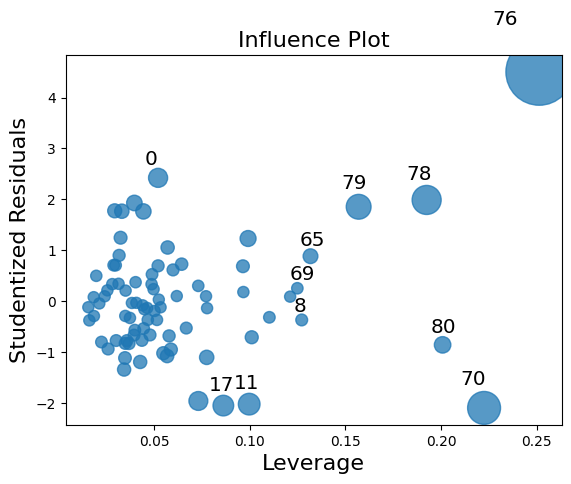

In [22]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [23]:
k = cars.shape[1]
n = cars.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [24]:
cars[cars.index.isin([70,76])]

,HP,MPG,VOL,SP,WT
70,280,19.678507,50,164.598513,15.823060
76,322,36.900000,50,169.598513,16.132947


In [25]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [27]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
file_name=list(uploaded.keys())[0]
cars=pd.read_csv(file_name)

Saving Cars.csv to Cars (1).csv


In [31]:
car1=cars.drop(cars.index[[70,76]],axis=0).reset_index()

In [32]:
car1=car1.drop(['index'],axis=1)

In [33]:
car1

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
74,175,18.762837,129,132.864163,42.778219
75,238,19.197888,115,150.576579,37.923113
76,263,34.000000,50,151.598513,15.769625
77,295,19.833733,119,167.944460,39.423099


In [34]:
final_ml_V= smf.ols('MPG~VOL+SP+HP',data = car1).fit()

In [35]:
(final_ml_V.rsquared,final_ml_V.aic)

(0.8161692010376008, 446.1172263944772)

In [36]:
final_ml_W= smf.ols('MPG~WT+SP+HP',data = car1).fit()

In [39]:
(final_ml_W.rsquared,final_ml_W.aic)

(0.8160034320495303, 446.1884323575032)

In [40]:
model_influence_V = final_ml_V.get_influence()
(c_V, _) = model_influence_V.cooks_distance

Text(0, 0.5, 'Cooks Distance')

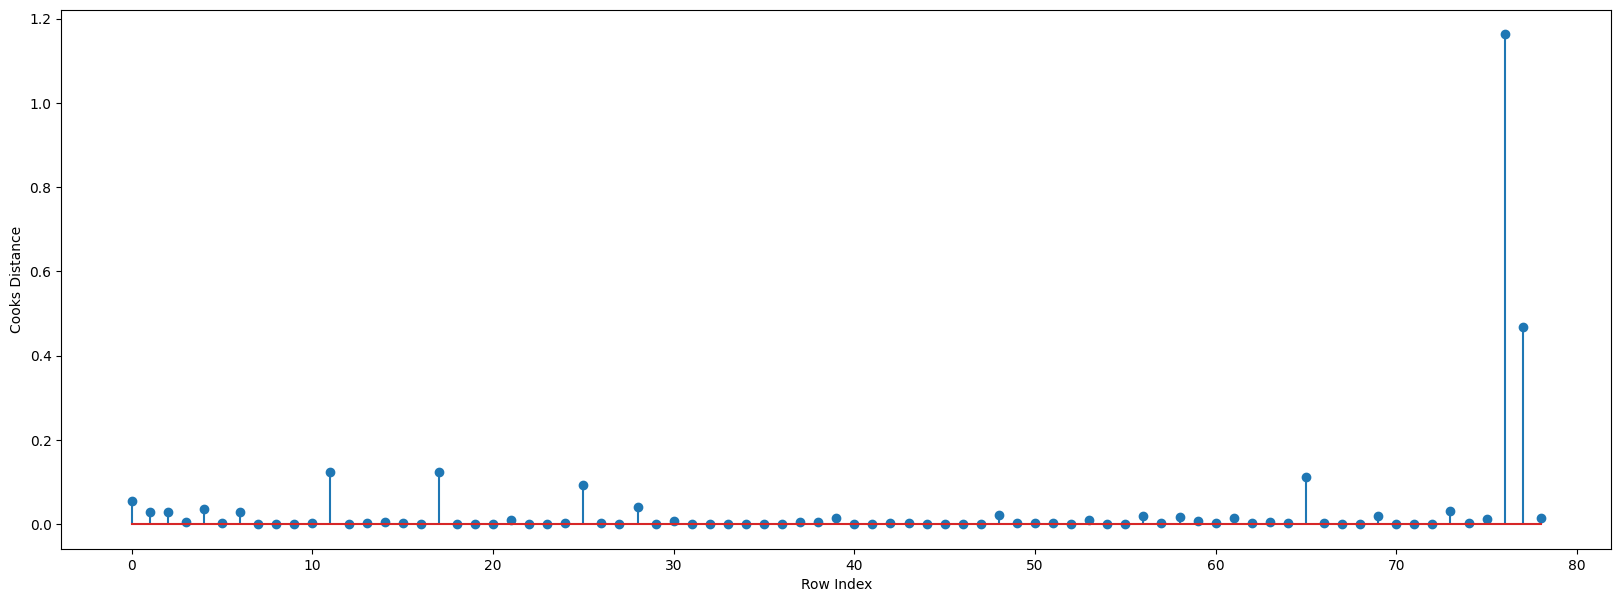

In [41]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(car1)),np.round(c_V,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')


In [42]:
(np.argmax(c_V),np.max(c_V))

(76, 1.1629387469135182)

In [44]:
car2=car1.drop(car1.index[[76,77]],axis=0)